In [1]:
%matplotlib inline

import matplotlib 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import json

In [3]:
df_review = pd.read_json('review-sample-100k.json', lines = True)

In [5]:
rating = df_review['stars'].value_counts().sort_index()
rating_pct = 100.0*rating/sum(rating)

# Linear Regression: Word Count and Star Rating

In [6]:
# Count number of words for each review
df_review['word_count'] = df_review['text'].apply(lambda x: len(x.split()))
word_by_rating = df_review.groupby(['stars']).agg({'word_count':np.mean})

In [7]:
# Simple linear regression to examine the relationship between star rating and word counts 
import statsmodels.api as sm
x = df_review['stars']
y = df_review['word_count']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

/Users/liupei-pei/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             word_count   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     4433.
Date:                Sun, 13 May 2018   Prob (F-statistic):               0.00
Time:                        20:17:50   Log-Likelihood:            -6.0473e+05
No. Observations:              100000   AIC:                         1.209e+06
Df Residuals:                   99998   BIC:                         1.209e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.8550      0.915    185.675      0.000     168.062     171.648
stars        -15.2120      0.228    -66.580      0.000     -15.660     -14.764
==============================================================================
Omnibus:                    55242.360   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           532432.700
Skew:                           2.515   Prob(JB):                         0.00
Kurtosis:                      13.124   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Figure 1: Word Count and Star Rating

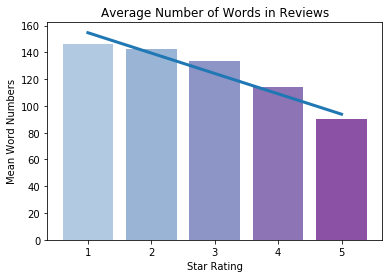

In [8]:
# Now plot!
colors = plt.cm.BuPu(np.linspace(0.3,0.7,len(rating_pct))) # use pretty colorspace
plot2 = plt.bar(word_by_rating.index, word_by_rating.values, color = colors)
plt.xlabel('Star Rating')
plt.ylabel('Mean Word Numbers')
plt.title('Average Number of Words in Reviews')

Beta0, Beta1 = model.params
X_plot = np.linspace(1,5,5)
plt.plot(X_plot, X_plot*Beta1 + Beta0, linewidth = 3.0)


# Combining Reviews with Restaurant IDs

In [9]:
df_restuarant = pd.read_json('business.json', lines = True)

In [10]:
df_review = df_review.rename(columns = {"stars": "stars_review"})
df_complete = pd.merge(df_review,df_restuarant, on = 'business_id')

# Linear Regression: Sentence Count and Star Rating

In [11]:
from nltk import tokenize
df_complete['sent_count'] = df_complete['text'].apply(lambda x: len(tokenize.sent_tokenize(x)))
sent_by_rating = df_complete.groupby(['stars_review']).agg({'sent_count':np.mean})


In [12]:
# Testing number of sentence and rating
import statsmodels.api as sm
x3 = df_complete['stars_review']
y3 = df_complete['sent_count']
x3 = sm.add_constant(x3)
model3 = sm.OLS(y3, x3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sent_count   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2666.
Date:                Sun, 13 May 2018   Prob (F-statistic):               0.00
Time:                        20:20:59   Log-Likelihood:            -3.2841e+05
No. Observations:              100000   AIC:                         6.568e+05
Df Residuals:                   99998   BIC:                         6.568e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.9974      0.058    190.550      0.000      10.884      11.111
stars_review    -0.7442      0.014    -51.629      0.000      -0.772      -0.716
==============================================================================
Omnibus:                    55145.206   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           569627.021
Skew:                           2.480   Prob(JB):                         0.00
Kurtosis:                      13.588   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Figure 2: Sentence Count and Star Rating

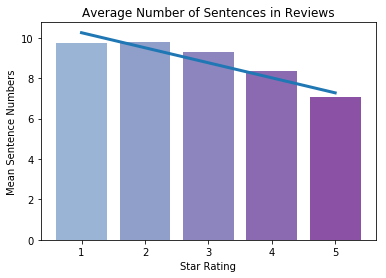

In [50]:
# Plot
colors = plt.cm.BuPu(np.linspace(0.4,0.7,len(sent_by_rating)))
plot4 = plt.bar(sent_by_rating.index, sent_by_rating.values, color = colors)
plt.xlabel('Star Rating')
plt.ylabel('Mean Sentence Numbers')
plt.title('Average Number of Sentences in Reviews')

Beta0, Beta1 = model3.params
X_plot = np.linspace(1,5,5)
plt.plot(X_plot, X_plot*Beta1 + Beta0, linewidth = 3.0)


# Overall Rating and 3-Star Reviews

In [13]:
x = df_complete.groupby(['stars','stars_review'], as_index = False).count()

In [14]:
## calculating percetage of each review rating for restaurants of every level

x['rating_pct'] = 5
totall = []
yyy = []
rating_pct = []
for y in x.stars.unique():
    mask = x['stars'] == y
    total = x[mask]['business_id'].sum()
    totall.append(total)   
    yyy.append(y)
    for i in x[mask].index:
        pct = x[mask]['business_id'][i]/float(total)
        rating_pct.append(pct)
        
#print rating_pct

In [15]:
x['rating_pct'] = rating_pct

In [16]:
mask2 = x['stars_review'] == 3


# Regression: Overall Rating and percentages of 3-star reviews

In [17]:
import statsmodels.api as sm
x1 = x[mask2]['stars']
y1 = x[mask2]['rating_pct']
x1 = sm.add_constant(x1)
model = sm.OLS(y1, x1).fit()
model.summary()
# Results: All restaurants are equally likely to get 3-star reviews

/Users/liupei-pei/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             rating_pct   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.143
Method:                 Least Squares   F-statistic:                 1.074e-05
Date:                Sun, 13 May 2018   Prob (F-statistic):              0.997
Time:                        20:23:01   Log-Likelihood:                 12.148
No. Observations:                   9   AIC:                            -20.30
Df Residuals:                       7   BIC:                            -19.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0956      0.060      1.593      0.155      -0.046       0.237
stars       -6.02e-05      0.018     -0.003      0.997      -0.043       0.043
==============================================================================
Omnibus:                        1.196   Durbin-Watson:                   0.497
Prob(Omnibus):                  0.550   Jarque-Bera (JB):                0.675
Skew:                          -0.174   Prob(JB):                        0.713
Kurtosis:                       1.704   Cond. No.                         8.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Figure 3: Overall Rating and percentages of 3-star reviews

([<matplotlib.axis.XTick at 0x118c00c10>,
 <a list of 9 Text xticklabel objects>)

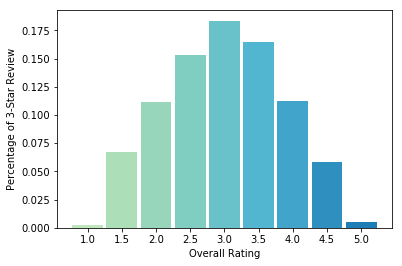

In [56]:
# Plot 3-star percentage across overall ratings
colors = plt.cm.GnBu(np.linspace(0.3,0.8,len(x1))) # use pretty color
plot3 = plt.bar(x[mask2]['stars'].values, x[mask2]['rating_pct'].values, color = colors, width = 0.45)
plt.xlabel('Overall Rating')
plt.ylabel('Percentage of 3-Star Review')
plt.xticks(np.arange(1, 5.5, 0.5))
#plt.title('Percentage of Different Rating')